In [5]:
import re
from numpy import log2 as log2
from numpy import log as log
from collections import Counter
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия? 

In [6]:
with open('data/lenta.txt', 'r', encoding='utf-8') as fil:
    corpus = fil.read()

ru_stopwords = set(stopwords.words('russian'))
sentences = sent_tokenize(corpus, language='russian') #делим текст на предложения - чтобы не считались n-граммы соседних предл

tokenized_sentences = [word_tokenize (sentence) for sentence in sentences] #список списков из слов в каждом предложении

tokenized_sentences = [[token.lower() for token in sentence if not re.match('\W+', token)] for sentence in tokenized_sentences]
#Убираем заглавные буквы и знаки препинания 

In [7]:
def ngrammer (tokens, n=5):
    ngrams = []
    for token in range(len(tokens)-n+1):
        ngrams.append(' '.join(tokens[token:token+n]))
    return ngrams

pentagrams_count = Counter()
for sentence in tokenized_sentences:
    pentagrams_count.update(ngrammer([token for token in sentence]))
#Здесь не убираем стоп-слова
    
print(pentagrams_count.most_common(20))
#Получаются в основном фразы-ссылки на информагентства - в целом, ни о чём не говорит. Все более или менее уважающие себя медиа
#всегда ссылаются на источники. 

[('риа новости со ссылкой на', 400), ('сообщает риа новости со ссылкой', 320), ('как сообщили риа новости в', 196), ('как сообщает риа новости со', 149), ('сообщает интерфакс со ссылкой на', 142), ('сообщает итар-тасс со ссылкой на', 118), ('об этом риа новости сообщили', 113), ('об этом сообщает риа новости', 104), ('этом риа новости сообщили в', 99), ('со ссылкой на источники в', 93), ('сообщили риа новости в пресс-службе', 88), ('группировки войск на северном кавказе', 84), ('как сообщает интерфакс со ссылкой', 83), ('объединенной группировки войск на северном', 83), ('новости со ссылкой на пресс-службу', 76), ('эхо москвы со ссылкой на', 76), ('этом сообщает риа новости со', 75), ('в связи с тем что', 70), ('по борьбе с организованной преступностью', 66), ('как сообщает итар-тасс со ссылкой', 58)]


In [8]:
pentagrams_count_no_stopwords = Counter()
for sentence in tokenized_sentences:
    pentagrams_count_no_stopwords.update(ngrammer([token for token in sentence if token not in ru_stopwords]))
    
#Теперь убираем стоп-слова 
    
print(pentagrams_count_no_stopwords.most_common(20))
#Теперь получается определить как минимум две тенденции: Лента часто пишет на военную тематику, также следит за
#российским истеблишментом. То есть, освещают политическую тематику. 

[('объединенной группировки войск северном кавказе', 83), ('сообщает риа новости ссылкой пресс-службу', 57), ('обязанности президента россии владимир путин', 47), ('группировки федеральных сил северном кавказе', 37), ('помощник президента россии сергей ястржембский', 35), ('делам печати телерадиовещания средств массовых', 31), ('объединенной группировки федеральных сил северном', 31), ('печати телерадиовещания средств массовых коммуникаций', 30), ('штабе объединенной группировки федеральных сил', 25), ('министр иностранных дел россии игорь', 24), ('первый заместитель начальника генерального штаба', 23), ('сообщает риа новости ссылкой источники', 23), ('объединенной группировкой войск северном кавказе', 23), ('иностранных дел россии игорь иванов', 23), ('прямом эфире радиостанции эхо москвы', 20), ('главного управления борьбе организованной преступностью', 20), ('начальника генерального штаба вооруженных сил', 20), ('заместитель начальника генштаба вооруженных сил', 20), ('сообщает феде

In [9]:
tokens_no_sent = word_tokenize(corpus, preserve_line=True)
tokens_no_sent = [token for token in tokens_no_sent if not re.match('\W+', token) if token not in ru_stopwords]

pentagrams_count_no_sent = Counter()
pentagrams_count_no_sent.update(ngrammer([token for token in tokens_no_sent]))

print(pentagrams_count_no_sent.most_common(20))
#Если не делить текст на предложения, то снова в большинстве получаются ссылки на агентства. 

[('Как сообщает РИА Новости ссылкой', 132), ('Об сообщает РИА Новости ссылкой', 71), ('сообщает РИА Новости ссылкой пресс-службу', 57), ('Как сообщили РИА Новости пресс-службе', 55), ('Объединенной группировки войск Северном Кавказе', 46), ('обязанности президента России Владимир Путин', 46), ('сообщает РИА Новости По словам', 41), ('Об РИА Новости сообщили пресс-службе', 33), ('передает РИА Новости По словам', 32), ('делам печати телерадиовещания средств массовых', 31), ('печати телерадиовещания средств массовых коммуникаций', 29), ('Объединенной группировки федеральных сил Северном', 25), ('Как стало известно РИА Новости', 23), ('сообщает РИА Новости ссылкой источники', 23), ('Как сообщает агентство РИА Новости', 22), ('министр иностранных дел России Игорь', 22), ('штабе Объединенной группировки федеральных сил', 22), ('Объединенной группировки войск Северном Кавказе.', 21), ('прямом эфире радиостанции Эхо Москвы', 20), ('группировки федеральных сил Северном Кавказе', 20)]


## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2019)

Вставьте сюда скриншот

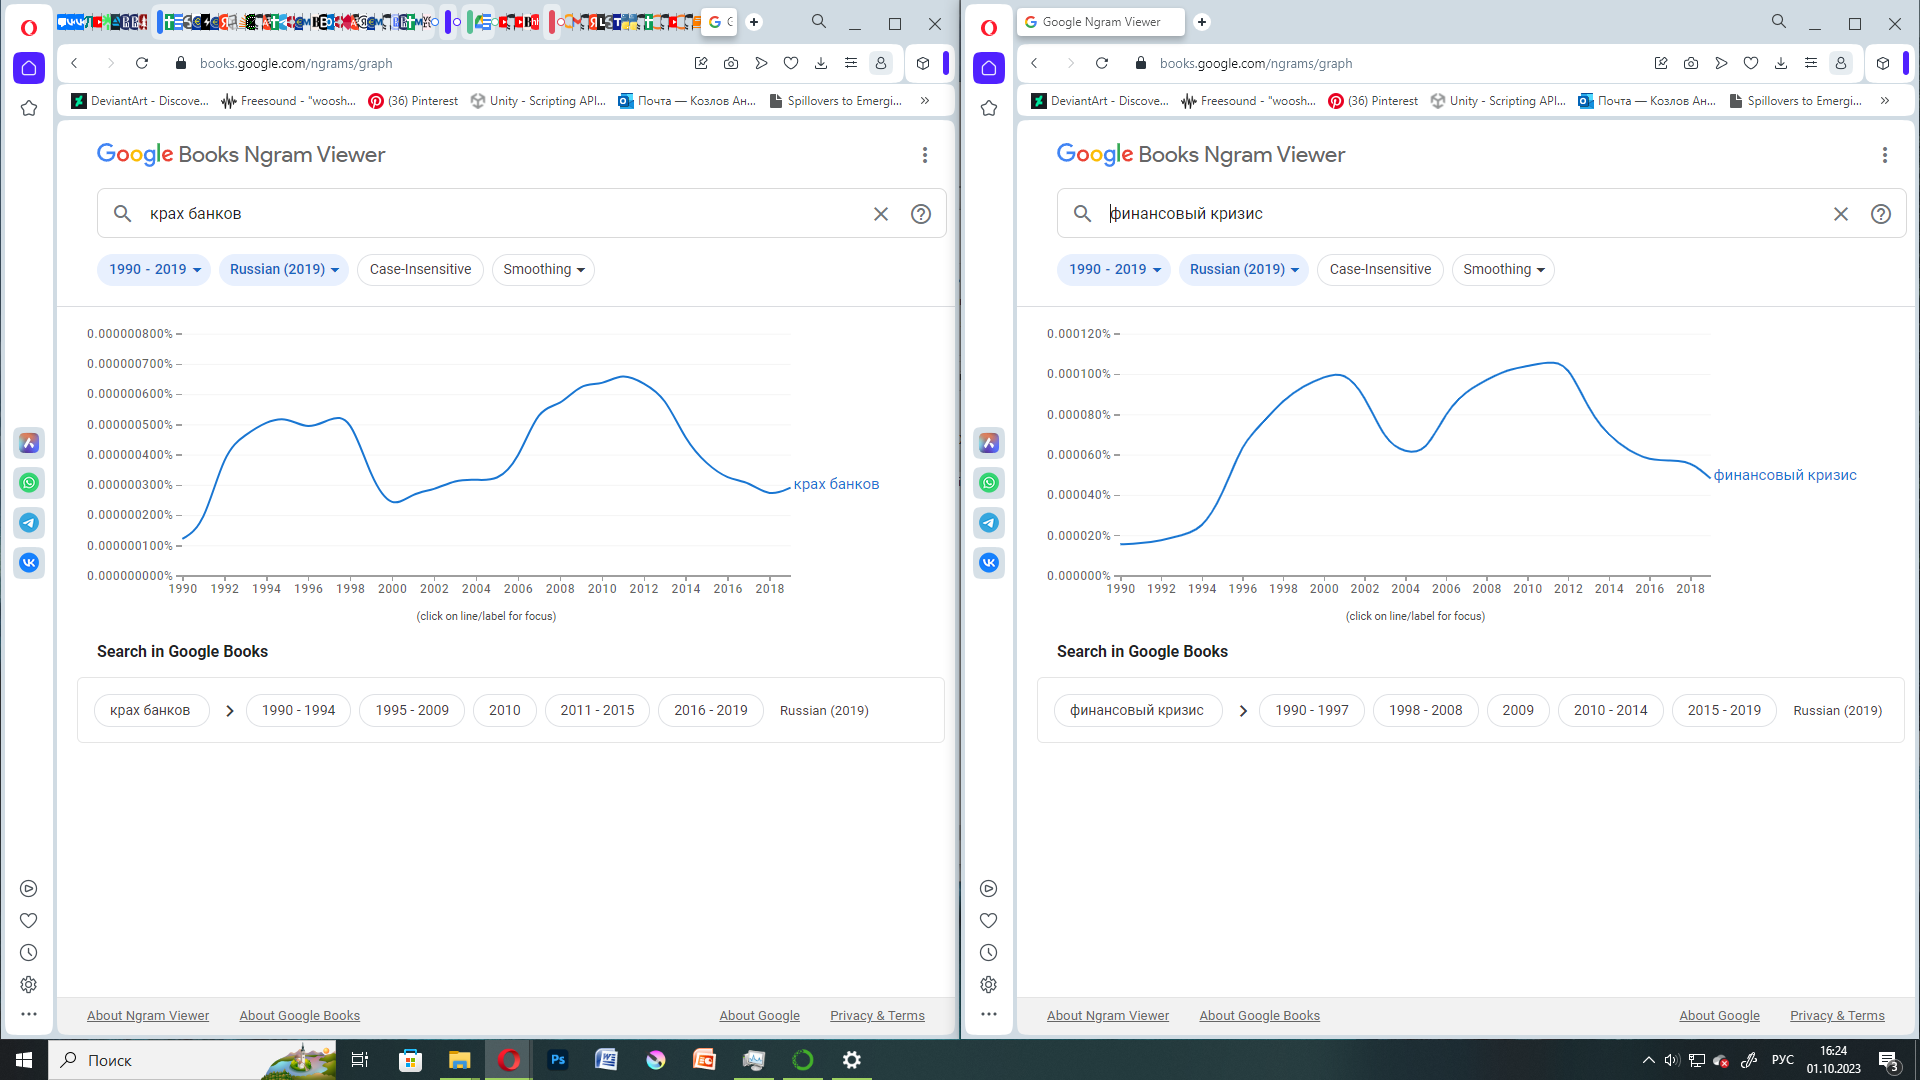

Здесь показана статистика н-граммов для словосочетаний "крах банков" и "финансовый кризис". 
Они даны в разных окнах для лучшей видимости динамики - левое словосочетание встречается значителньо реже правого и теряется, если их помещать на общем графике. 
Интересная закономерность, которую я наблюдаю здесь, заключается в том, что частотность употребления н-грамма "крах банков" увеличивается незадолго до повышения частотности н-грамма "финансовый кризис". Это отражает традиционную экономическую закономерность: крупные системные проблемы в финансовом секторе начинаются с главного распределителя денег в экономике - с баноков. Соответственно, мы наблюдаем, что частота употребления "краха банков" стала резко расти с 1991 г., в то время, как частота "финансового кризиса" перешла к увеличению только к середине 1990-х гг. Оба н-грамма закономерно участились с дефолтом 1998 г. 
Интересно, что оба н-грамма одинаково участились в преддверии жилищного кризиса 2007-2009 гг., - оба начали рост уже в 2005 г.

## Заданиe 3

In [10]:
def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

Когда мы разбирали PMI мы использовали такую функцию:

In [11]:
def collect_stats(corpus, stops):
    ## соберем статистики для отдельных слов
    ## и биграммов
    
    unigrams = Counter()
    bigrams = Counter()
    
    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2, stops))
    
    return unigrams, bigrams

unigrams, bigrams = collect_stats(tokenized_sentences, ru_stopwords)

In [12]:
def scorer_simple(word_count_a, word_count_b, bigram_count, min_count=0): 
    #На семинаре мы также добавили минимальный порогр вхождения min_count, я сохранил его здесь
    try:
        score = (bigram_count - min_count)/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [13]:
all_words = word_tokenize(corpus)
all_words = [token for token in tokens_no_sent if not re.match('\W+', token) if token not in ru_stopwords]

In [14]:
def scorer_updated(word_count_a, word_count_b, bigram_count, min_count=0):
    try:
        #Вычисляем вероятности при помощи переменной all_words,
        #которая содержит информацию о числе слов в корпусе 
        
        #Для числителя, вероятности биграмма, делим общее число раз, когда нам встретился биграмм
        #на всё число слов в тексте, делённое на 2 - вероятность, что каждые 2 слова окажутся искомым биграммом
        
        #Для знаменателя делим каждую часть биграмма на всё число слов в тексте
        #Вместе с этим воссоздаём формулу
        score = log2(bigram_count/(len(all_words)/2))/((word_count_a/len(all_words))*(word_count_b/len(all_words)))
        
    except ZeroDivisionError:
        return 0
    return score

In [15]:
def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=0):
        ## посчитаем метрику для каждого нграмма
    bigram2score = Counter()
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], bigrams[bigram], min_count)
        
        ## если метрика выше порога, добавляем в словарик
        #if score > threshold:
        bigram2score[bigram] = score
    
    return bigram2score

In [16]:
bigram_score_simple = score_bigrams(unigrams, bigrams, scorer_simple, min_count=20)
bigram_score_simple.most_common(10)

[('риа новости', 0.4900746163592848),
 ('северном кавказе', 0.44553483807654565),
 ('associated press', 0.4345991561181435),
 ('new york', 0.4218009478672986),
 ('сих пор', 0.39092055485498106),
 ('взрывное устройство', 0.3665768194070081),
 ('таким образом', 0.3657187993680885),
 ('рао еэс', 0.33954451345755693),
 ('доменных имен', 0.31512605042016806),
 ('чрезвычайным ситуациям', 0.30935251798561153)]

In [17]:
bigram_score_updated = score_bigrams(unigrams, bigrams, scorer_updated, min_count=20) 
#Вычисляем вероятности при помощи обновлённого присваивателя счёта 
bigram_score_updated.most_common(10)

[('сообщает риа', -739466.8450357158),
 ('россии сообщает', -752713.657084317),
 ('риа новости', -795584.7615206991),
 ('россии россии', -879341.9700280108),
 ('россии также', -880201.1481382326),
 ('года россии', -1051079.6424121347),
 ('также россии', -1109745.8939714835),
 ('года сообщает', -1134291.3234298024),
 ('также сообщает', -1158210.1351259563),
 ('сообщает также', -1184483.3751161091)]

При использовании предлагаемой формулы мы обнаруживаем, что как минимум два биграмма из топ-3, "сообщает риа" и "риа новости", сходятся с результатами исходного оценщика, что позволяет предположить, что новая функция действительно выдаёт наиболее частотные биграммы.
Тем не менее, мы наблюдаем множество конструкций, которые, скорее всего, находятся на стыке предложений. Так, "россии сообщает" очень похоже на остаток от высказывания эксперта вроде:

"Это откажет негативный эффект на экономику *России", - сообщает* Иванов.

Вероятно, стоит изменить подход к вычислеию вероятностей в формуле для обновлённой функции-оценщика. 

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов. 

In [18]:
def scorer_updated_updated(word_count_a, word_count_b, bigram_count, min_count=0):
    try:
        score = log2(log(bigram_count/(len(all_words)/2)) - log(log(word_count_a/len(all_words))+log(word_count_b/len(all_words))))
        
    except ZeroDivisionError:
        return 0
    return score

In [19]:
bigram_score_updated2 = score_bigrams(unigrams, bigrams, scorer_updated_updated, min_count=20) 

bigram_score_updated.most_common(10)

C:\Users\tohet\AppData\Local\Temp\ipykernel_4164\1276511501.py:3: RuntimeWarning: invalid value encountered in log
  score = log2(log(bigram_count/(len(all_words)/2)) - log(log(word_count_a/len(all_words))+log(word_count_b/len(all_words))))


[('сообщает риа', -739466.8450357158),
 ('россии сообщает', -752713.657084317),
 ('риа новости', -795584.7615206991),
 ('россии россии', -879341.9700280108),
 ('россии также', -880201.1481382326),
 ('года россии', -1051079.6424121347),
 ('также россии', -1109745.8939714835),
 ('года сообщает', -1134291.3234298024),
 ('также сообщает', -1158210.1351259563),
 ('сообщает также', -1184483.3751161091)]

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

In [20]:
import gensim

In [21]:
def scorer_gensim(worda_count, wordb_count, bigram_count, corpus_word_count, len_vocab=0,  min_count=0):

    try:
        score = ((bigram_count - min_count) * corpus_word_count) / (worda_count * wordb_count)
    except ZeroDivisionError:
        return 0
    
    return score

In [25]:
ph = gensim.models.Phrases(tokenized_sentences, min_count=1, threshold=1.,scoring=scorer_gensim)
p = gensim.models.phrases.Phraser(ph)
ph2 = gensim.models.Phrases(p[tokenized_sentences],  min_count=1, threshold=1., scoring=scorer_gensim)
p2 = gensim.models.phrases.Phraser(ph2)

print(p2[p[tokenized_sentences[32]]])

bigram_score_gensim = score_bigrams(unigrams, bigrams, scorer_gensim, min_count=20) 
bigram_score_gensim.most_common(10)

['журнал_нива_сентябрь_1914', 'годалица', 'приехавшие', 'в_варшаву', 'из', 'люблина', 'передают', 'что', 'туда', 'доставлен', 'швабский_зверь', 'взятый', 'в_плен', 'прусский', 'майор', 'прейскер', 'бывший', 'комендант', 'калиша']


[('сопоцкина друскеник', 20.0),
 ('неприятель приблизившись', 20.0),
 ('саноку обстреливалась', 20.0),
 ('м.ю лермонтова', 20.0),
 ('австрийский аэроплан', 20.0),
 ('показывался аэроплан-птица', 20.0),
 ('das ist', 20.0),
 ('ist nesteroff', 20.0),
 ('песнь нестерове', 20.0),
 ('могучий унесся', 20.0)]

In [39]:
#Адаптируем выведение счета слов под original_scorer и npmi_scorer из gensim
def score_bigrams_gensim(unigrams, bigrams, scorer=gensim.models.phrases.original_scorer, threshold=-100000, min_count=0, ):
    bigram2score = Counter()
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], bigrams[bigram], 40000, min_count, len(all_words))
        
        #gensim.models.phrases.original_scorer(worda_count, wordb_count, bigram_count, len_vocab, min_count, corpus_word_count)
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score

In [41]:
#Тестируем original_scorer
bigram_score_gensim2 = score_bigrams_gensim(unigrams, bigrams, min_count=20) 
bigram_score_gensim2.most_common(10)

[('wall street', 455.8404558404559),
 ('саудовской аравии', 452.1118381915527),
 ('street journal', 401.2345679012345),
 ('dow jones', 394.0886699507389),
 ('подписных листов', 381.55802861685214),
 ('следственном изоляторе', 375.49407114624506),
 ('чрезвычайным ситуациям', 356.25517812758903),
 ('france presse', 351.5625),
 ('персидском заливе', 350.1683501683502),
 ('полевые командиры', 350.00000000000006)]

In [44]:
#Тестируем original_scorer - с другими min_count и threshold
bigram_score_gensim2 = score_bigrams_gensim(unigrams, bigrams, min_count=100, threshold=0) 
bigram_score_gensim2.most_common(10)

[('new york', 88.38383838383838),
 ('associated press', 72.65574186588829),
 ('взрывное устройство', 66.45306752106325),
 ('сих пор', 59.96219774489995),
 ('рао еэс', 59.45219053011537),
 ('северном кавказе', 57.62933857236412),
 ('возбуждено уголовное', 44.973049238875234),
 ('прошлой неделе', 42.623727208145866),
 ('таким образом', 38.3145595326224),
 ('правоохранительные органы', 38.25803825803826)]

In [43]:
#Тестируем npmi_scorer
bigram_score_gensim3 = score_bigrams_gensim(unigrams, bigrams, scorer=gensim.models.phrases.npmi_scorer, min_count=20) 
bigram_score_gensim3.most_common(10)

[('dow jones', 0.9967009908700861),
 ('exit polls', 0.9963516483959212),
 ('wall street', 0.9962327061183408),
 ('риа новости', 0.9950849115325453),
 ('норильский никель', 0.9924341210154285),
 ('саудовской аравии', 0.9902944872600808),
 ('new york', 0.9857872428265099),
 ('подписные листы', 0.985714987684105),
 ('ak m', 0.9856820075258076),
 ('северном кавказе', 0.9815003203856391)]

In [45]:
#Тестируем npmi_scorer  - с другими min_count и threshold
bigram_score_gensim3 = score_bigrams_gensim(unigrams, bigrams, scorer=gensim.models.phrases.npmi_scorer, min_count=100, threshold=0) 
bigram_score_gensim3.most_common(10)

[('риа новости', 0.9950849115325453),
 ('new york', 0.9857872428265099),
 ('северном кавказе', 0.9815003203856391),
 ('associated press', 0.9813400912408978),
 ('взрывное устройство', 0.9634747848651666),
 ('сих пор', 0.958040052635349),
 ('рао еэс', 0.9414672058001794),
 ('населенного пункта', 0.9400431376985295),
 ('таким образом', 0.9308257169776775),
 ('владимиром путиным', 0.9262555206384381)]

In [52]:
gs_bigrams = gensim.models.phrases.Phrases(tokenized_sentences, min_count=20, threshold=10)
gs_trigrams = gensim.models.phrases.Phrases(gs_bigrams[tokenized_sentences], threshold=10)
print(gs_bigrams)
print(gs_trigrams)

Phrases<876902 vocab, min_count=20, threshold=10, max_vocab_size=40000000>
Phrases<926528 vocab, min_count=5, threshold=10, max_vocab_size=40000000>


In [46]:
phrases = gensim.models.Phrases(tokenized_sentences, min_count=20, threshold=0.1)

for phrase, score in phrases.find_phrases(sentences).items():
    print(phrase, score)

и_к 0.1267867472127281
и_с 0.2438316734199157
и_я 0.14123892243114008
и_в 0.2807923181956727
а_с 0.5649266500123429
а_в 0.6875534263672007
и_о 0.19469551613476252
и_у 0.17074618629507468
с_1 12.87890799677067
